<a href="https://colab.research.google.com/github/Pradyumna1312/ML_SelfStudy/blob/main/ML_SelfStudy_LogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic regression
It is a statistical technique for modelling the probability of a specific class or occurrence.

Social Network Ads is a categorical dataset describes information about a product being purchased through an advertisement on social media.

Implementing Logistic regression model in Python to predict whether the product is purchased or not by a person using any one of the three attributes given in the dataset.

Follow the following steps:

1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
from math import exp
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

2. Load the dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Pradyumna1312/ML_SelfStudy/main/Datasets/Social_Network_Ads.csv")
X = df
Y = df.iloc[:,-1].values
X = df[df.columns[[1,2,3]]]
print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


3. Consider any one highly related input attribute with the output variable and
display the scatter plot

Covariance of Age with Output
 [[109.89070175   3.13116541]
 [  3.13116541   0.23026942]] 

 Covariance of Estimated Salary with Output
 [[1.16260270e+09 5.92436717e+03]
 [5.92436717e+03 2.30269424e-01]] 

Correlation of Age with Output
 0.6224541988845291 

 Correlation of Estimated Salary with Output
 0.3620830258046779


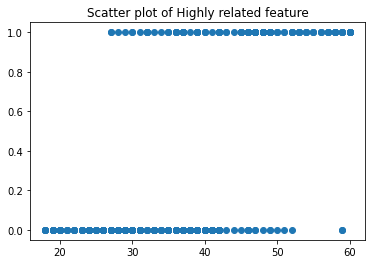

In [3]:
AY = np.cov(X['Age'],Y)
ESY = np.cov(X['EstimatedSalary'], Y)
print("Covariance of Age with Output\n", AY,'\n\n',"Covariance of Estimated Salary with Output\n", ESY,'\n')

corrAY, _ = pearsonr(X['Age'],Y)
corrESY, _ = pearsonr(X['EstimatedSalary'], Y)
print("Correlation of Age with Output\n", corrAY,'\n\n',"Correlation of Estimated Salary with Output\n",corrESY)

# Therefore Age is highly related to output.

plt.scatter(X['Age'],Y)
plt.title("Scatter plot of Highly related feature")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size= 0.41, random_state= 0)

print(x_train)

     Gender  Age  EstimatedSalary
162  Female   37            33000
34     Male   27            90000
231    Male   39            42000
97     Male   28           123000
85   Female   31           118000
..      ...  ...              ...
323  Female   48            30000
192    Male   29            43000
117    Male   36            52000
47   Female   27            54000
172  Female   26           118000

[236 rows x 3 columns]


4. Use stochastic gradient decent method to train the model and use 300 epochs
and initialize the weights=0 and learning rate=0.001, threshold value =0.5.


In [5]:
def normalize(X):
    return X - X.mean()

# Method to make predictions
def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])

# Method to train the model
def logistic_regression(X, Y, epochs):

    X = normalize(X)

    # Initializing variables
    b0 = 0
    b1 = 0
    L = 0.001

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b0
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b1
        # Update b0 and b1
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
    
    return b0, b1

In [6]:
def sqr_err(y_true, y_pred):

    return np.array([(y_pred[i]-y_true[i])**2 for i in range(len(y_true))])



6. Predict the MSE and accuracy of the trained model after 300 epochs

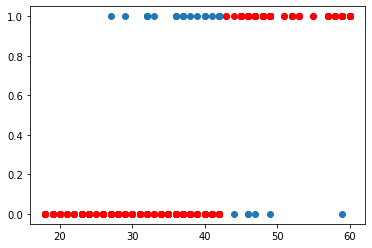

Accuracy = 0.8414634146341463
MSE = 0.15853658536585366


In [8]:
b0, b1 = logistic_regression(X['Age'],Y,300)

# Making predictions
X_test_norm = normalize(x_test['Age'])
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(x_test['Age'], y_test)
plt.scatter(x_test['Age'], y_pred, c="red")
plt.show()

# The accuracy
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")

# The MSE

mse = ((y_test - y_pred) ** 2).mean()
print("MSE =", mse)

5. Plot the MSE for 300 epochs

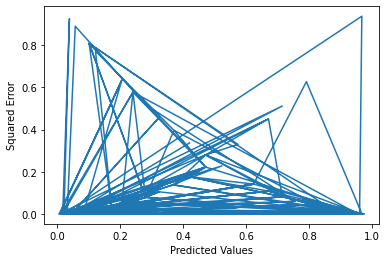

In [9]:
y_pred = predict(X_test_norm, b0, b1)
Squared_error = sqr_err(y_test, y_pred)
plt.figure()
plt.plot(y_pred, Squared_error)
plt.xlabel('Predicted Values')
plt.ylabel('Squared Error')
plt.show()

7. Validate the classification model for any 2 unseen values.

In [11]:
valid=np.array([20,40])
valid = normalize(valid)
y_valid = predict(valid,b0,b1)
y_valid = [1 if p >= 0.5 else 0 for p in y_valid]
print('The ouputs for Ages 20, 40 are as follows:', y_valid)

The ouputs for Ages 20, 40 are as follows: [0, 1]
